In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import skew
# Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm



In [2]:
df = pd.read_csv("datos/bikes_EDA_casual.csv", index_col=0)
df.drop("casual_BOX", inplace=True, axis =1)
df.head(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual
0,2018-01-01,winter,0,1,1,Monday,0,2,14.110847,80.5833,10.749882,331
1,2018-01-02,winter,0,1,0,Tuesday,1,2,14.902598,69.6087,16.652113,131
2,2018-01-03,winter,0,1,0,Wednesday,1,1,8.050924,43.7273,16.636703,120
3,2018-01-04,winter,0,1,0,Thursday,1,1,8.200000,59.0435,10.739832,108
4,2018-01-05,winter,0,1,0,Friday,1,1,9.305237,43.6957,12.522300,82


In [3]:
descript = df.describe().T
descript

,count,mean,std,min,25%,50%,75%,max
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.030137,0.171081,0.000000,0.000000,0.000000,0.000000,1.000000
workingday,730.0,0.687671,0.463761,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
hum,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000
windspeed,730.0,12.763620,5.195841,1.500244,9.041650,12.125325,15.625589,34.000021
casual,730.0,849.249315,686.479875,2.000000,316.250000,717.000000,1096.500000,3410.000000


In [4]:
mediana_casual = descript.loc["casual", "50%"]
mediana_casual

717.0

In [5]:
df_numericas = df.filter(['temp', 'hum', 'windspeed'])
df_numericas

,temp,hum,windspeed
0,14.110847,80.5833,10.749882
1,14.902598,69.6087,16.652113
2,8.050924,43.7273,16.636703
3,8.200000,59.0435,10.739832
4,9.305237,43.6957,12.522300
...,...,...,...
725,10.420847,65.2917,23.458911
726,10.386653,59.0000,10.416557
727,10.386653,75.2917,8.333661
728,10.489153,48.3333,23.500518


In [6]:
robust = RobustScaler()
robust.fit(df_numericas)
X_robust = robust.transform(df_numericas)

In [7]:
df_numericas_robust = pd.DataFrame(X_robust, columns = df_numericas.columns)
df_numericas_robust.head(2)

,temp,hum,windspeed
0,-0.486274,0.855582,-0.208909
1,-0.425690,0.332722,0.687550


In [8]:
df[df_numericas_robust.columns] = df_numericas_robust

In [9]:
lista_categoricas = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'casual_BOX']

In [10]:
df_season = df.groupby('season')["casual"].median().reset_index().sort_values(by = "casual")
df_season

,season,casual
3,winter,219.5
0,autumn,544.5
1,spring,867.0
2,summer,1050.5


In [11]:
print(f'winter: {round(df_season.loc[3, "casual"]/mediana_casual, 3)}')
print(f'autumn: {round(df_season.loc[0, "casual"]/mediana_casual, 3)}')
print(f'spring: {round(df_season.loc[1, "casual"]/mediana_casual, 3)}')
print(f'summer: {round(df_season.loc[2, "casual"]/mediana_casual, 3)}')

winter: 0.306
autumn: 0.759
spring: 1.209
summer: 1.465


In [12]:
df_yr = df.groupby('yr')["casual"].median().reset_index().sort_values(by = "casual")
df_yr

,yr,casual
0,0,614.0
1,1,905.0


In [13]:
print(f'0: {round(df_yr.loc[0, "casual"]/mediana_casual, 3)}')
print(f'1: {round(df_yr.loc[1, "casual"]/mediana_casual, 3)}')

0: 0.856
1: 1.262


In [14]:
df_mnth = df.groupby('mnth')["casual"].median().reset_index().sort_values(by = "casual")
df_mnth

,mnth,casual
0,1,126.5
1,2,202.5
11,12,292.5
10,11,449.0
2,3,508.5
9,10,771.5
3,4,832.5
4,5,887.0
5,6,968.5
8,9,970.0


In [15]:
print(f'1: {round(df_mnth.loc[0, "casual"]/mediana_casual, 3)}')
print(f'2: {round(df_mnth.loc[1, "casual"]/mediana_casual, 3)}')
print(f'3: {round(df_mnth.loc[2, "casual"]/mediana_casual, 3)}')
print(f'4: {round(df_mnth.loc[3, "casual"]/mediana_casual, 3)}')
print(f'5: {round(df_mnth.loc[4, "casual"]/mediana_casual, 3)}')
print(f'6: {round(df_mnth.loc[5, "casual"]/mediana_casual, 3)}')
print(f'7: {round(df_mnth.loc[6, "casual"]/mediana_casual, 3)}')
print(f'8: {round(df_mnth.loc[7, "casual"]/mediana_casual, 3)}')
print(f'9: {round(df_mnth.loc[8, "casual"]/mediana_casual, 3)}')
print(f'10: {round(df_mnth.loc[9, "casual"]/mediana_casual, 3)}')
print(f'11: {round(df_mnth.loc[10, "casual"]/mediana_casual, 3)}')
print(f'12: {round(df_mnth.loc[11, "casual"]/mediana_casual, 3)}')

1: 0.176
2: 0.282
3: 0.709
4: 1.161
5: 1.237
6: 1.351
7: 1.457
8: 1.55
9: 1.353
10: 1.076
11: 0.626
12: 0.408


In [16]:
df_holiday = df.groupby('holiday')["casual"].median().reset_index().sort_values(by = "casual")
df_holiday

,holiday,casual
0,0,717.0
1,1,942.0


In [17]:
print(f'0: {round(df_holiday.loc[0, "casual"]/mediana_casual, 3)}')
print(f'1: {round(df_holiday.loc[1, "casual"]/mediana_casual, 3)}')

0: 1.0
1: 1.314


In [18]:
df_weekday = df.groupby('weekday')["casual"].median().reset_index().sort_values(by = "casual")
df_weekday

,weekday,casual
0,Friday,537.5
2,Saturday,610.0
4,Thursday,628.5
6,Wednesday,666.5
3,Sunday,876.5
5,Tuesday,982.0
1,Monday,1434.0


In [19]:
print(f'Monday: {round(df_weekday.loc[1, "casual"]/mediana_casual, 3)}')
print(f'Tuesday: {round(df_weekday.loc[5, "casual"]/mediana_casual, 3)}')
print(f'Sunday	: {round(df_weekday.loc[3, "casual"]/mediana_casual, 3)}')
print(f'Wednesday: {round(df_weekday.loc[6, "casual"]/mediana_casual, 3)}')
print(f'Saturday: {round(df_weekday.loc[2, "casual"]/mediana_casual, 3)}')
print(f'Friday: {round(df_weekday.loc[0, "casual"]/mediana_casual, 3)}')
print(f'Thursday: {round(df_weekday.loc[4, "casual"]/mediana_casual, 3)}')

Monday: 2.0
Tuesday: 1.37
Sunday	: 1.222
Wednesday: 0.93
Saturday: 0.851
Friday: 0.75
Thursday: 0.877


In [20]:
df_weathersit = df.groupby('weathersit')["casual"].median().reset_index().sort_values(by = "casual")
df_weathersit

,weathersit,casual
2,3,126.0
1,2,535.0
0,1,829.0


In [21]:
print(f'3: {round(df_weathersit.loc[2, "casual"]/mediana_casual, 3)}')
print(f'2: {round(df_weathersit.loc[1, "casual"]/mediana_casual, 3)}')
print(f'1: {round(df_weathersit.loc[0, "casual"]/mediana_casual, 3)}')

3: 0.176
2: 0.746
1: 1.156


In [22]:
df_workingday = df.groupby('workingday')["casual"].median().reset_index().sort_values(by = "casual")
df_workingday

,workingday,casual
1,1,717.0
0,0,722.0


In [23]:
print(f'1: {round(df_workingday.loc[1, "casual"]/mediana_casual, 3)}')
print(f'0: {round(df_workingday.loc[0, "casual"]/mediana_casual, 3)}')

1: 1.0
0: 1.007


In [24]:
df["season_encoding"] = df["season"].map({"winter": 0.3, "autumn":0.8, 
                                          "spring": 1.3, "summer": 1.3})
df['yr_encoding'] = df['yr'].map({0:round(df_yr.loc[0, "casual"]/mediana_casual, 3), 1:round(df_yr.loc[1, "casual"]/mediana_casual, 3)})
df['mnth_encoding'] = df['mnth'].map({1:round(df_mnth.loc[0, "casual"]/mediana_casual, 3), 2: round(df_mnth.loc[1, "casual"]/mediana_casual, 3), 
                                      3: round(df_mnth.loc[2, "casual"]/mediana_casual, 3), 4: round(df_mnth.loc[3, "casual"]/mediana_casual, 3), 
                                      5:round(df_mnth.loc[4, "casual"]/mediana_casual, 3), 6:round(df_mnth.loc[5, "casual"]/mediana_casual, 3), 
                                      7: round(df_mnth.loc[6, "casual"]/mediana_casual, 3), 8:round(df_mnth.loc[7, "casual"]/mediana_casual, 3), 
                                      9:round(df_mnth.loc[8, "casual"]/mediana_casual, 3), 10:round(df_mnth.loc[9, "casual"]/mediana_casual, 3), 
                                      11:round(df_mnth.loc[10, "casual"]/mediana_casual, 3), 12:round(df_mnth.loc[11, "casual"]/mediana_casual, 3)})
df['holiday_encoding'] = df['holiday'].map({0:round(df_holiday.loc[0, "casual"]/mediana_casual, 3), 1:round(df_holiday.loc[1, "casual"]/mediana_casual, 3)})

df['weekday_encoding'] = df['weekday'].map({'Monday':round(df_weekday.loc[1, "casual"]/mediana_casual, 3), 
                                            'Tuesday':round(df_weekday.loc[5, "casual"]/mediana_casual, 3), 
                                            'Wednesday':round(df_weekday.loc[6, "casual"]/mediana_casual, 3), 
                                            'Thursday':round(df_weekday.loc[4, "casual"]/mediana_casual, 3), 
                                            'Friday':round(df_weekday.loc[0, "casual"]/mediana_casual, 3), 
                                            'Saturday':round(df_weekday.loc[2, "casual"]/mediana_casual, 3), 
                                            'Sunday':round(df_weekday.loc[3, "casual"]/mediana_casual, 3)})
df['weathersit_encoding'] = df['weathersit'].map({1:round(df_weathersit.loc[0, "casual"]/mediana_casual, 3), 
                                                  2:round(df_weathersit.loc[1, "casual"]/mediana_casual, 3), 
                                                  3:round(df_weathersit.loc[2, "casual"]/mediana_casual, 3)})
df['workingday_encoding'] = df['workingday'].map({0:round(df_workingday.loc[0, "casual"]/mediana_casual, 3), 
                                                  1:round(df_workingday.loc[1, "casual"]/mediana_casual, 3)})

In [26]:
# oh = OneHotEncoder()
# transformados_wd = oh.fit_transform(df[["workingday"]])
# oh_df = pd.DataFrame(transformados_wd.toarray())
# oh_df.columns = oh.get_feature_names_out()
# df = pd.concat([df,oh_df],axis=1)

In [27]:
df.drop(columns=['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 
                 'workingday_encoding'], inplace=True)

In [28]:
X = df.drop("casual", axis = 1)
y = df["casual"]

In [63]:
X.head(1)

,temp,hum,windspeed,season_encoding,yr_encoding,mnth_encoding,holiday_encoding,weekday_encoding,weathersit_encoding
0,-0.486274,0.855582,-0.208909,0.3,0.856,0.176,1.314,2.0,0.746


In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [31]:
arbol = DecisionTreeRegressor(random_state = 2)

arbol.fit(x_train, y_train)

DecisionTreeRegressor(random_state=2)

In [32]:
max_features = np.sqrt(len(x_train.columns))
max_features

3.0

In [33]:
print(arbol.tree_.max_depth)

17


In [34]:
y_pred_test_dt = arbol.predict(x_test)
y_pred_train_dt = arbol.predict(x_train)

In [35]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [mean_absolute_error(y_test, y_test_pred), mean_absolute_error(y_train, y_train_pred)],
                'MSE': [mean_squared_error(y_test, y_test_pred), mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_test_pred)), np.sqrt(mean_squared_error(y_train, y_train_pred))],
                'R2':  [r2_score(y_test, y_test_pred), r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df

In [36]:
dt_results1 = metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decision Tree I")
dt_results1

,MAE,MSE,RMSE,R2,set,modelo
0,282.342466,225644.616438,475.020648,0.532404,test,Decision Tree I
1,0.000000,0.000000,0.000000,1.000000,train,Decision Tree I


In [37]:
param = {"max_depth": [5, 6, 7, 8, 9, 10, 11], 
        "max_features": [2,3,4,5],
        "min_samples_split": [20, 30, 50],
        "min_samples_leaf": [20, 30, 50, ]} 

In [38]:
gs = GridSearchCV(
            estimator=DecisionTreeRegressor(random_state=0), 
            param_grid= param, 
            cv=10, 
            verbose=-1, 
            return_train_score = True, 
            scoring="neg_mean_squared_error") 

In [39]:
gs.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11],
                         'max_features': [2, 3, 4, 5],
                         'min_samples_leaf': [20, 30, 50],
                         'min_samples_split': [20, 30, 50]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

In [40]:
mejor_modelo = gs.best_estimator_
mejor_modelo

DecisionTreeRegressor(max_depth=5, max_features=3, min_samples_leaf=20,
                      min_samples_split=20, random_state=0)

In [41]:
y_pred_test_dt2 = mejor_modelo.predict(x_test)
y_pred_train_dt2 = mejor_modelo.predict(x_train)

In [42]:
dt_results2 = metricas(y_test, y_train, y_pred_test_dt2, y_pred_train_dt2, "Decision tree II")
dt_results2

,MAE,MSE,RMSE,R2,set,modelo
0,321.431605,222401.044932,471.594153,0.539125,test,Decision tree II
1,315.377812,216072.775343,464.836289,0.537886,train,Decision tree II


In [43]:
df_decision_results = pd.concat([dt_results1, dt_results2], axis = 0)
df_decision_results

,MAE,MSE,RMSE,R2,set,modelo
0,282.342466,225644.616438,475.020648,0.532404,test,Decision Tree I
1,0.000000,0.000000,0.000000,1.000000,train,Decision Tree I
0,321.431605,222401.044932,471.594153,0.539125,test,Decision tree II
1,315.377812,216072.775343,464.836289,0.537886,train,Decision tree II


In [44]:
param2 = {"max_depth": [ 5, 6, 7, 8, 9, 10, 11], 
        "max_features": [3,4,5,6,7],
        "min_samples_split": [15, 20, 30, 50],
        "min_samples_leaf": [15, 20, 30, 50]} 

In [45]:
gs2 = GridSearchCV(
            estimator=DecisionTreeRegressor(random_state=0), 
            param_grid= param2, 
            cv=10, 
            verbose=-1, 
            return_train_score = True, 
            scoring="neg_mean_squared_error") 

In [46]:
gs2.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11],
                         'max_features': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [15, 20, 30, 50],
                         'min_samples_split': [15, 20, 30, 50]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

In [47]:
mejor_modelo2 = gs2.best_estimator_
mejor_modelo2

DecisionTreeRegressor(max_depth=6, max_features=7, min_samples_leaf=15,
                      min_samples_split=15, random_state=0)

In [48]:
y_pred_test_dt3 = mejor_modelo2.predict(x_test)
y_pred_train_dt3 = mejor_modelo2.predict(x_train)

In [49]:
dt_results3 = metricas(y_test, y_train, y_pred_test_dt3, y_pred_train_dt3, "Decision tree III")
dt_results3

,MAE,MSE,RMSE,R2,set,modelo
0,238.104892,108319.734017,329.119635,0.775532,test,Decision tree III
1,222.926245,119908.662075,346.278301,0.743552,train,Decision tree III


In [50]:
df_decision_results = pd.concat([df_decision_results, dt_results3], axis = 0)
df_decision_results

,MAE,MSE,RMSE,R2,set,modelo
0,282.342466,225644.616438,475.020648,0.532404,test,Decision Tree I
1,0.000000,0.000000,0.000000,1.000000,train,Decision Tree I
0,321.431605,222401.044932,471.594153,0.539125,test,Decision tree II
1,315.377812,216072.775343,464.836289,0.537886,train,Decision tree II
0,238.104892,108319.734017,329.119635,0.775532,test,Decision tree III
1,222.926245,119908.662075,346.278301,0.743552,train,Decision tree III


In [51]:
bosque = RandomForestRegressor(max_depth=7, max_features=6, min_samples_leaf=5,
                      min_samples_split=15, random_state=0)
bosque.fit(x_train, y_train)

RandomForestRegressor(max_depth=7, max_features=6, min_samples_leaf=5,
                      min_samples_split=15, random_state=0)

In [52]:
y_pred_test_rf = bosque.predict(x_test)
y_pred_train_rf = bosque.predict(x_train)

In [53]:
rf_results = metricas(y_test, y_train, y_pred_test_rf, y_pred_train_rf, "Random Forest")
rf_results

,MAE,MSE,RMSE,R2,set,modelo
0,224.559872,95943.351654,309.747238,0.801180,test,Random Forest
1,191.177485,85785.177430,292.891068,0.816532,train,Random Forest


In [54]:
results = pd.concat([df_decision_results, rf_results], axis = 0)
results

,MAE,MSE,RMSE,R2,set,modelo
0,282.342466,225644.616438,475.020648,0.532404,test,Decision Tree I
1,0.000000,0.000000,0.000000,1.000000,train,Decision Tree I
0,321.431605,222401.044932,471.594153,0.539125,test,Decision tree II
1,315.377812,216072.775343,464.836289,0.537886,train,Decision tree II
0,238.104892,108319.734017,329.119635,0.775532,test,Decision tree III
1,222.926245,119908.662075,346.278301,0.743552,train,Decision tree III
0,224.559872,95943.351654,309.747238,0.801180,test,Random Forest
1,191.177485,85785.177430,292.891068,0.816532,train,Random Forest


In [55]:
param_rf = {"max_depth": [ 6, 7, 8], 
        "max_features": [3,4,5,6],
        "min_samples_split": [5, 10, 15, 20 ],
        "min_samples_leaf": [5, 10, 20]} 

In [56]:
gs_rf = GridSearchCV(
            estimator=RandomForestRegressor(random_state=0), 
            param_grid= param_rf, 
            cv=10, 
            verbose=-1, 
            return_train_score = True, 
            scoring="neg_mean_squared_error") 

In [57]:
gs_rf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [6, 7, 8], 'max_features': [3, 4, 5, 6],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [5, 10, 15, 20]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

In [58]:
bosque2 = gs_rf.best_estimator_
bosque2

RandomForestRegressor(max_depth=8, max_features=6, min_samples_leaf=5,
                      min_samples_split=5, random_state=0)

In [59]:
y_pred_test_rf2 = bosque2.predict(x_test)
y_pred_train_rf2 = bosque2.predict(x_train)

In [60]:
dt_results_rf2 = metricas(y_test, y_train, y_pred_test_rf2, y_pred_train_rf2, "Random Forest II")
dt_results_rf2

,MAE,MSE,RMSE,R2,set,modelo
0,208.649092,85669.565500,292.693638,0.822470,test,Random Forest II
1,173.555768,71839.541136,268.028993,0.846357,train,Random Forest II


In [61]:

# vamos a crearnos un dataframe 
importancia_predictores = pd.DataFrame(
                            {'predictor': x_train.columns,
                             'importancia': bosque2.feature_importances_}
                            )


# ordenamos de mayor a menor los resultados
importancia_predictores.sort_values(by=["importancia"], ascending=False, inplace = True)

# printeamos los resultados
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores


Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
7,weekday_encoding,0.315980
0,temp,0.304460
5,mnth_encoding,0.147526
1,hum,0.065696
4,yr_encoding,0.059999
2,windspeed,0.046498
3,season_encoding,0.030335
8,weathersit_encoding,0.029505
6,holiday_encoding,0.000000


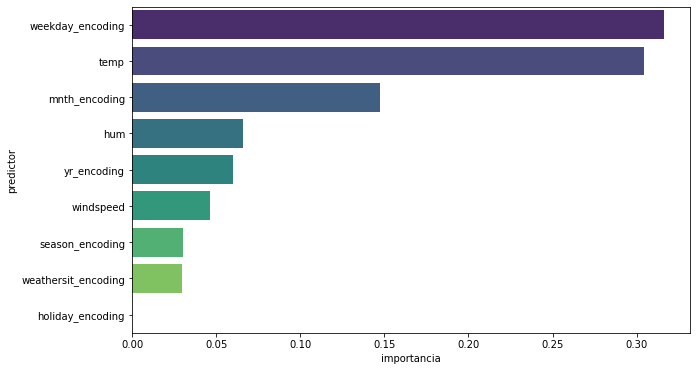

In [62]:
plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores, palette="viridis");
plt.show()

In [72]:
df.head()

,temp,hum,windspeed,casual,season_encoding,yr_encoding,mnth_encoding,holiday_encoding,weekday_encoding,weathersit_encoding
0,-0.486274,0.855582,-0.208909,331,0.3,0.856,0.176,1.314,2.000,0.746
1,-0.425690,0.332722,0.687550,131,0.3,0.856,0.176,1.000,1.370,0.746
2,-0.949970,-0.900337,0.685210,120,0.3,0.856,0.176,1.000,0.930,1.156
3,-0.938563,-0.170632,-0.210435,108,0.3,0.856,0.176,1.000,0.877,1.156
4,-0.853992,-0.901843,0.060294,82,0.3,0.856,0.176,1.000,0.750,1.156


In [104]:
usuarios = {"season": ["winter", "summer", "autumn", "spring", "summer"], "holiday": [0,1,0,1,1], 
            "weekday": ["Monday", "Wednesday", "Thursday", "Saturday", "Sunday"], 
            "temp": [11, 23, 14, 15, 32], "atemp": [9,26, 16, 15, 34], 
            "hum": [47, 30, 35, 20,22], "windspeed":  [15, 14, 20, 25, 3], "yr":[1,1,1,0,0], 
            "mnth":[3,7, 10, 4,8], 
            "workingday": [0, 1, 1, 0, 0], "weathersit":[2,1,3,1,2]}
df_usuarios = pd.DataFrame(usuarios, index = [0, 1, 2, 3, 4])
df_usuarios

,season,holiday,weekday,temp,atemp,hum,windspeed,yr,mnth,workingday,weathersit
0,winter,0,Monday,11,9,47,15,1,3,0,2
1,summer,1,Wednesday,23,26,30,14,1,7,1,1
2,autumn,0,Thursday,14,16,35,20,1,10,1,3
3,spring,1,Saturday,15,15,20,25,0,4,0,1
4,summer,1,Sunday,32,34,22,3,0,8,0,2


In [105]:
df_usuarios.drop("atemp", axis = 1, inplace= True)

In [106]:
df_usu_num = df_usuarios.filter(['temp', 'hum', 'windspeed'])
df_usu_num

,temp,hum,windspeed
0,11,47,15
1,23,30,14
2,14,35,20
3,15,20,25
4,32,22,3


In [107]:
df_usu_num_est = pd.DataFrame(robust.transform(df_usu_num), columns = df_usu_num.columns)
df_usu_num_est

,temp,hum,windspeed
0,-0.724311,-0.744417,0.436619
1,0.193911,-1.554343,0.284735
2,-0.494756,-1.316130,1.196043
3,-0.418237,-2.030770,1.955467
4,0.882578,-1.935485,-1.385998


In [108]:
df_usuarios[df_usu_num_est.columns] = df_usu_num_est
df_usuarios

,season,holiday,weekday,temp,hum,windspeed,yr,mnth,workingday,weathersit
0,winter,0,Monday,-0.724311,-0.744417,0.436619,1,3,0,2
1,summer,1,Wednesday,0.193911,-1.554343,0.284735,1,7,1,1
2,autumn,0,Thursday,-0.494756,-1.316130,1.196043,1,10,1,3
3,spring,1,Saturday,-0.418237,-2.030770,1.955467,0,4,0,1
4,summer,1,Sunday,0.882578,-1.935485,-1.385998,0,8,0,2


In [109]:
df_usuarios["season_encoding"] = df_usuarios["season"].map({"winter": 0.3, "autumn":0.8, 
                                          "spring": 1.3, "summer": 1.3})
df_usuarios['yr_encoding'] = df_usuarios['yr'].map({0:round(df_yr.loc[0, "casual"]/mediana_casual, 3), 1:round(df_yr.loc[1, "casual"]/mediana_casual, 3)})
df_usuarios['mnth_encoding'] = df_usuarios['mnth'].map({1:round(df_mnth.loc[0, "casual"]/mediana_casual, 3), 2: round(df_mnth.loc[1, "casual"]/mediana_casual, 3), 
                                      3: round(df_mnth.loc[2, "casual"]/mediana_casual, 3), 4: round(df_mnth.loc[3, "casual"]/mediana_casual, 3), 
                                      5:round(df_mnth.loc[4, "casual"]/mediana_casual, 3), 6:round(df_mnth.loc[5, "casual"]/mediana_casual, 3), 
                                      7: round(df_mnth.loc[6, "casual"]/mediana_casual, 3), 8:round(df_mnth.loc[7, "casual"]/mediana_casual, 3), 
                                      9:round(df_mnth.loc[8, "casual"]/mediana_casual, 3), 10:round(df_mnth.loc[9, "casual"]/mediana_casual, 3), 
                                      11:round(df_mnth.loc[10, "casual"]/mediana_casual, 3), 12:round(df_mnth.loc[11, "casual"]/mediana_casual, 3)})
df_usuarios['holiday_encoding'] = df_usuarios['holiday'].map({0:round(df_holiday.loc[0, "casual"]/mediana_casual, 3), 1:round(df_holiday.loc[1, "casual"]/mediana_casual, 3)})

df_usuarios['weekday_encoding'] = df_usuarios['weekday'].map({'Monday':round(df_weekday.loc[1, "casual"]/mediana_casual, 3), 
                                            'Tuesday':round(df_weekday.loc[5, "casual"]/mediana_casual, 3), 
                                            'Wednesday':round(df_weekday.loc[6, "casual"]/mediana_casual, 3), 
                                            'Thursday':round(df_weekday.loc[4, "casual"]/mediana_casual, 3), 
                                            'Friday':round(df_weekday.loc[0, "casual"]/mediana_casual, 3), 
                                            'Saturday':round(df_weekday.loc[2, "casual"]/mediana_casual, 3), 
                                            'Sunday':round(df_weekday.loc[3, "casual"]/mediana_casual, 3)})
df_usuarios['weathersit_encoding'] = df_usuarios['weathersit'].map({1:round(df_weathersit.loc[0, "casual"]/mediana_casual, 3), 
                                                  2:round(df_weathersit.loc[1, "casual"]/mediana_casual, 3), 
                                                  3:round(df_weathersit.loc[2, "casual"]/mediana_casual, 3)})
df_usuarios['workingday_encoding'] = df_usuarios['workingday'].map({0:round(df_workingday.loc[0, "casual"]/mediana_casual, 3), 
                                                  1:round(df_workingday.loc[1, "casual"]/mediana_casual, 3)})

In [110]:
df_usuarios

,season,holiday,weekday,temp,hum,windspeed,yr,mnth,workingday,weathersit,season_encoding,yr_encoding,mnth_encoding,holiday_encoding,weekday_encoding,weathersit_encoding,workingday_encoding
0,winter,0,Monday,-0.724311,-0.744417,0.436619,1,3,0,2,0.3,1.262,0.709,1.000,2.000,0.746,1.007
1,summer,1,Wednesday,0.193911,-1.554343,0.284735,1,7,1,1,1.3,1.262,1.457,1.314,0.930,1.156,1.000
2,autumn,0,Thursday,-0.494756,-1.316130,1.196043,1,10,1,3,0.8,1.262,1.076,1.000,0.877,0.176,1.000
3,spring,1,Saturday,-0.418237,-2.030770,1.955467,0,4,0,1,1.3,0.856,1.161,1.314,0.851,1.156,1.007
4,summer,1,Sunday,0.882578,-1.935485,-1.385998,0,8,0,2,1.3,0.856,1.550,1.314,1.222,0.746,1.007


In [111]:
df_usuarios.drop(columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 
                 'workingday_encoding'], inplace=True)

In [118]:
predicciones_casual = pd.DataFrame(bosque2.predict(df_usuarios))
predicciones_casual.rename(columns={0:"usuarios_casual"}, inplace = True)
predicciones_casual

,usuarios_casual
0,516.147883
1,1069.264443
2,469.644232
3,563.699166
4,1414.694317


In [119]:
predicciones_casual.to_csv("datos/predicciones_casual.csv")